<a href="https://colab.research.google.com/github/nicolerdz/Regresion-Lineal/blob/main/CALIFORNIA_6_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("Cali_limpio.csv", index_col=0)
df

,ï»¿id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,9.580000e+02,2.020000e+13,1169,1.0,1.0,0.0,37.770280,-122.433170,3.0,0.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",$202.00,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,5.858000e+03,2.020000e+13,8904,2.0,2.0,0.0,37.744740,-122.420890,4.0,0.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",$235.00,t,06/03/2023,03/05/2009,06/08/2017,--,f
2,8.142000e+03,2.020000e+13,21994,13.0,14.0,0.0,37.765550,-122.452130,1.0,0.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",$56.00,t,06/03/2023,08/09/2014,27/10/2022,--,f
3,8.339000e+03,2.020000e+13,24215,2.0,6.0,0.0,37.775640,-122.436420,4.0,0.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",$575.00,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,8.739000e+03,2.020000e+13,7149,2.0,2.0,0.0,37.760300,-122.421970,3.0,0.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",$110.00,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,8.180000e+17,2.020000e+13,495900269,9.0,9.0,0.0,37.791994,-122.410000,2.0,0.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",$164.00,t,06/03/2023,--,--,147904,t
6932,8.180000e+17,2.020000e+13,499392537,1.0,1.0,0.0,37.763060,-122.432023,2.0,0.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$228.00,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f
6933,8.180000e+17,2.020000e+13,499294716,1.0,1.0,0.0,37.777633,-122.416478,1.0,0.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer – In unit"", ""Mountain view""...",$104.00,t,06/03/2023,--,--,--,f
6934,8.180000e+17,2.020000e+13,485596413,3.0,4.0,0.0,37.738325,-122.396603,2.0,0.0,...,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",$65.00,t,06/03/2023,--,--,2022-012562STR,f


In [5]:
df.isnull().sum().sum()

0

In [6]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

# **ENTIRE HOME/APT**

##host_acceptance_rate vs host_response_rate

In [8]:
entire=df[df['room_type']=='Entire home/apt']

In [9]:
dependiente= []
independiente= []
corr= []
deter=[]

In [10]:
data= entire

In [11]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

<ipython-input-11-0ef7a7995669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-11-0ef7a7995669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-11-0ef7a7995669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [12]:
dep= data[['host_acceptance_rate']]
ind= data[['host_response_rate']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

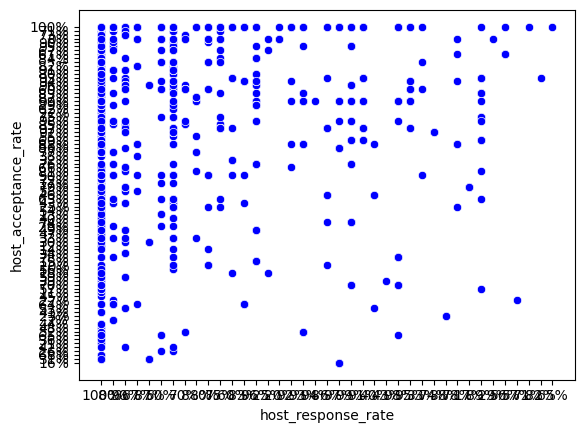

In [13]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [14]:
Vars_Indep= ind
Var_Dep= dep

In [15]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [16]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [17]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [18]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.57945128]]),
 'rank_': 1,
 'singular_': array([2347.94677559]),
 'intercept_': array([30.03968227])}

**Modelo matemático: y= 0.62852689x + 32.77244893**

---




In [19]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.39416666547931

In [20]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[87.9848101 ],
       [76.39578453],
       [87.9848101 ],
       ...,
       [87.9848101 ],
       [30.03968227],
       [87.9848101 ]])

In [21]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-21-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,host_response_rate,Predicciones
0,100.0,100.0,87.984810
1,71.0,80.0,76.395785
3,0.0,100.0,87.984810
5,95.0,100.0,87.984810
8,61.0,100.0,87.984810
...,...,...,...
6923,100.0,100.0,87.984810
6928,0.0,100.0,87.984810
6931,100.0,100.0,87.984810
6932,0.0,0.0,30.039682


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

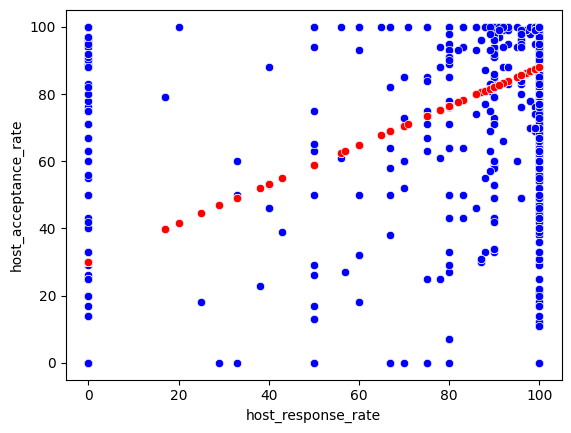

In [22]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [23]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.39416666547931

In [24]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.6278269391156371

In [25]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “host_acceptance_rate vs price”

In [26]:
data= entire

In [27]:
data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)

<ipython-input-27-d16a30ad7a49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price= data.price.replace({'\$':''}, regex = True)
<ipython-input-27-d16a30ad7a49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price= data.price.replace({'\,':''}, regex = True)
<ipython-input-27-d16a30ad7a49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [28]:
dep= data[['host_acceptance_rate']]
ind= data[['price']]

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

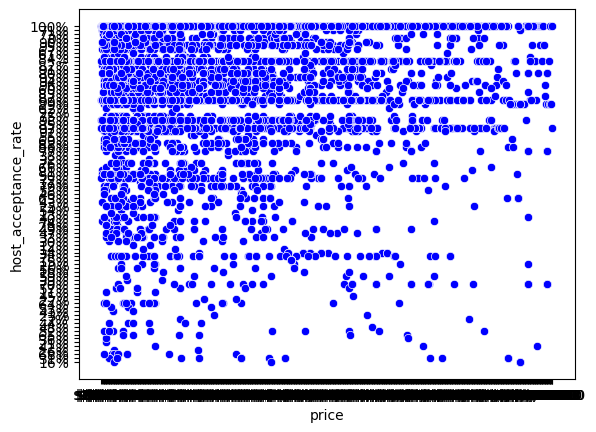

In [29]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [30]:
Vars_Indep= ind
Var_Dep= dep

In [31]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [32]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [33]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [34]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.0022975]]),
 'rank_': 1,
 'singular_': array([35440.1013724]),
 'intercept_': array([79.18208555])}

**Modelo matemático: y= 0.62852689x + 32.77244893**

---




In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0014117967321802816

In [36]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[78.71798965],
       [78.64217201],
       [77.8610205 ],
       ...,
       [78.80529482],
       [78.65825454],
       [78.32052139]])

In [37]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-37-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,price,Predicciones
0,100.0,202.0,78.717990
1,71.0,235.0,78.642172
3,0.0,575.0,77.861020
5,95.0,259.0,78.587032
8,61.0,425.0,78.205646
...,...,...,...
6923,100.0,110.0,78.929360
6928,0.0,175.0,78.780022
6931,100.0,164.0,78.805295
6932,0.0,228.0,78.658255


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

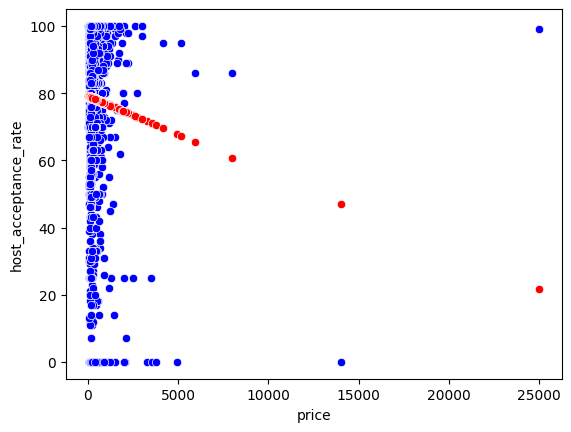

In [38]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [39]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.0014117967321802816

In [40]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.03757388364516345

In [41]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “host_acceptance_rate vs number_of_reviews ”

In [42]:
data= entire

In [43]:
dep= data[['host_acceptance_rate']]
ind= data[['number_of_reviews']]

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

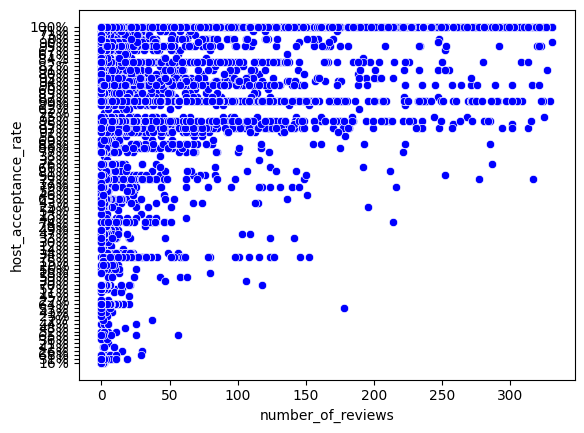

In [44]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [45]:
Vars_Indep= ind
Var_Dep= dep

In [46]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [47]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [48]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [49]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.08682233]]),
 'rank_': 1,
 'singular_': array([3911.29623822]),
 'intercept_': array([75.72948706])}

**Modelo matemático: y= 0.15211964x + 84.17320674**

---




In [50]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02455691751959621

In [51]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[75.72948706],
       [85.36676581],
       [78.16051233],
       ...,
       [75.72948706],
       [75.81630939],
       [75.72948706]])

In [52]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-52-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,number_of_reviews,Predicciones
0,100.0,0.0,75.729487
1,71.0,111.0,85.366766
3,0.0,28.0,78.160512
5,95.0,234.0,96.045913
8,61.0,56.0,80.591538
...,...,...,...
6923,100.0,0.0,75.729487
6928,0.0,0.0,75.729487
6931,100.0,0.0,75.729487
6932,0.0,1.0,75.816309


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

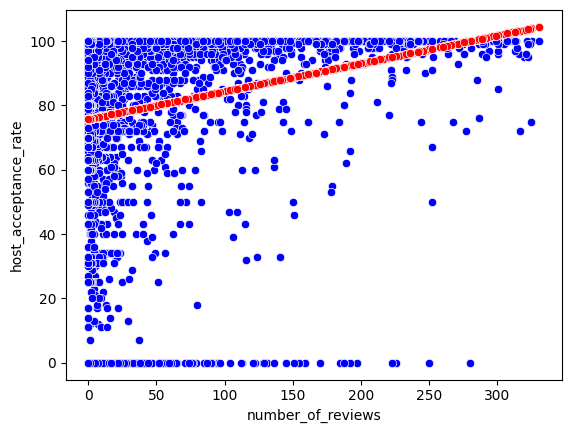

In [53]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.02455691751959621

In [55]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.15670646929720614

In [56]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “review_scores_location vs review_scores_cleanliness”

In [57]:
data= entire

In [58]:
dep= data[['review_scores_location']]
ind= data[['review_scores_cleanliness']]

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

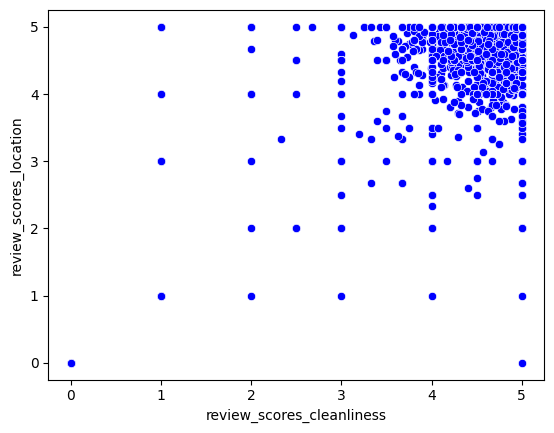

In [59]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [60]:
Vars_Indep= ind
Var_Dep= dep

In [61]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [62]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [63]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [64]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.98093589]]),
 'rank_': 1,
 'singular_': array([129.69908962]),
 'intercept_': array([0.07467695])}

**Modelo matemático: y= 0.0.918502x + 0.38539555**

---




In [65]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.9607957504747275

In [66]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[4.90088154],
       [4.85183475],
       [4.97935641],
       ...,
       [0.07467695],
       [4.97935641],
       [0.07467695]])

In [67]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-67-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_location,review_scores_cleanliness,Predicciones
0,4.98,4.92,4.900882
1,4.77,4.87,4.851835
3,4.94,5.00,4.979356
5,4.78,4.88,4.861644
8,4.91,4.86,4.842025
...,...,...,...
6923,0.00,0.00,0.074677
6928,0.00,0.00,0.074677
6931,0.00,0.00,0.074677
6932,5.00,5.00,4.979356


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

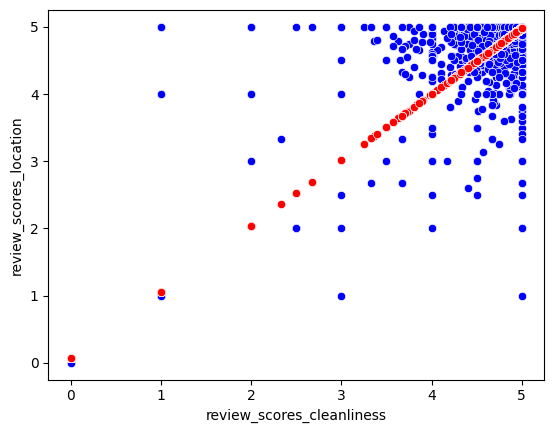

In [68]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [69]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.9607957504747275

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9802018927112555

In [71]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])
deter.append(coef_Deter)
corr.append(coef_Correl)

## “availability_365 vs number_of_reviews”

In [72]:
data= entire

In [73]:
dep= data[['availability_365']]
ind= data[['number_of_reviews']]

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

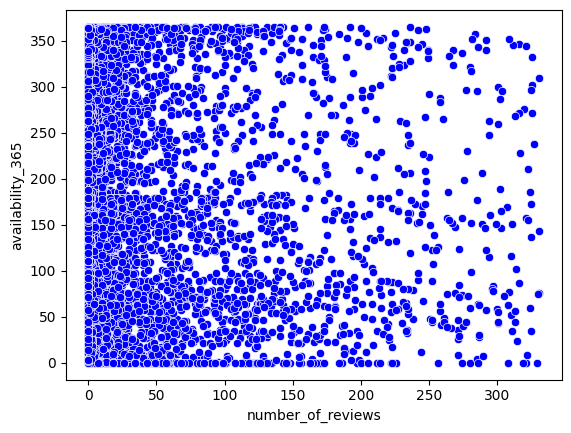

In [74]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [75]:
Vars_Indep= ind
Var_Dep= dep

In [76]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [77]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [78]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [79]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.21914912]]),
 'rank_': 1,
 'singular_': array([3911.29623822]),
 'intercept_': array([173.01757939])}

**Modelo matemático: y= -0.25499994x + 246.03421549**

---




In [80]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010569604883017503

In [81]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[173.01757939],
       [148.69202731],
       [166.88140409],
       ...,
       [173.01757939],
       [172.79843028],
       [173.01757939]])

In [82]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-82-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,number_of_reviews,Predicciones
0,128,0.0,173.017579
1,365,111.0,148.692027
3,365,28.0,166.881404
5,32,234.0,121.736686
8,7,56.0,160.745229
...,...,...,...
6923,26,0.0,173.017579
6928,248,0.0,173.017579
6931,57,0.0,173.017579
6932,356,1.0,172.798430


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

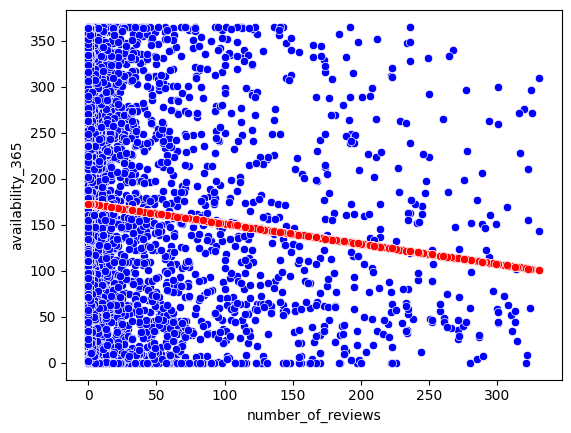

In [83]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [84]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.010569604883017503

In [85]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.10280858370300362

In [86]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])
deter.append(coef_Deter)
corr.append(coef_Correl)

## “reviews_per_month vs review_scores_communication”

In [87]:
data= entire

In [88]:
dep= data[['reviews_per_month']]
ind= data[['review_scores_communication']]

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

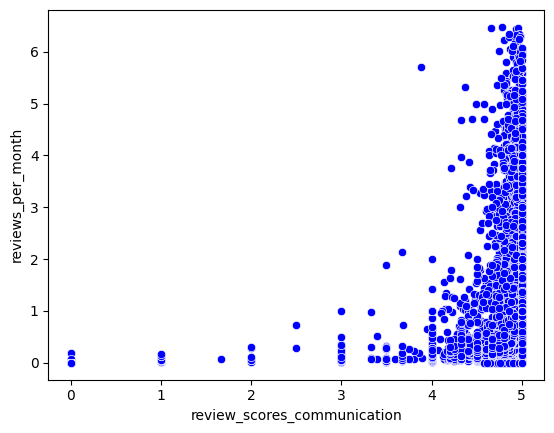

In [89]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [90]:
Vars_Indep= ind
Var_Dep= dep

In [91]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [92]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [93]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [94]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.23275838]]),
 'rank_': 1,
 'singular_': array([131.25606924]),
 'intercept_': array([-0.02446095])}

**Modelo matemático: y= 0.28910344x + 0.16789008**

---




In [95]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.123237254676961

In [96]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[ 1.11139992],
       [ 1.10441717],
       [ 1.13933092],
       ...,
       [-0.02446095],
       [ 1.13933092],
       [-0.02446095]])

In [97]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-97-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,reviews_per_month,review_scores_communication,Predicciones
0,2.31,4.88,1.111400
1,0.66,4.85,1.104417
3,0.17,5.00,1.139331
5,1.69,4.97,1.132348
8,0.44,4.91,1.118383
...,...,...,...
6923,0.00,0.00,-0.024461
6928,0.00,0.00,-0.024461
6931,0.00,0.00,-0.024461
6932,1.00,5.00,1.139331


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

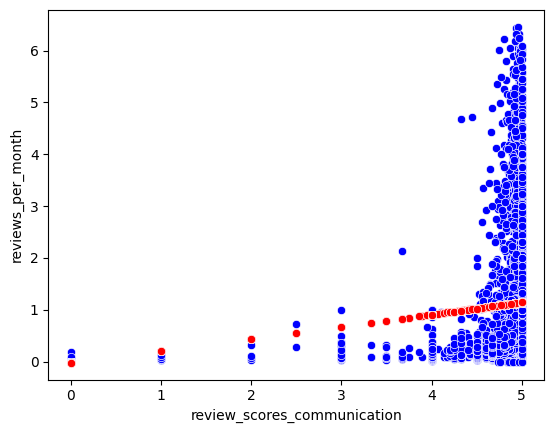

In [98]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [99]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.123237254676961

In [100]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.35105164104011966

In [101]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])
deter.append(coef_Deter)
corr.append(coef_Correl)

# **HOTEL ROOM**

##host_acceptance_rate vs host_response_rate

In [102]:
hotel=df[df['room_type']=='Hotel room']

In [103]:
data= hotel

In [104]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

<ipython-input-104-0ef7a7995669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-104-0ef7a7995669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-104-0ef7a7995669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [105]:
dep= data[['host_acceptance_rate']]
ind= data[['host_response_rate']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

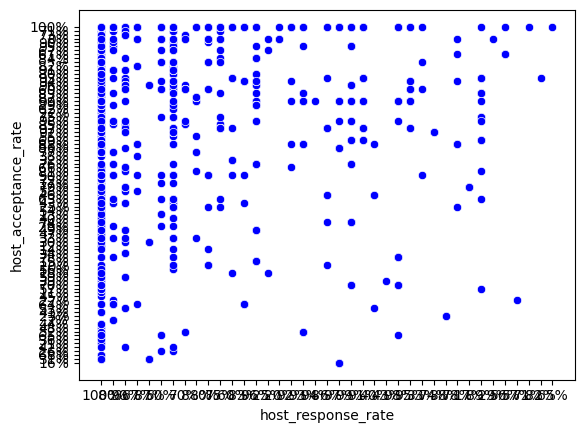

In [106]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [107]:
Vars_Indep= ind
Var_Dep= dep

In [108]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [109]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [110]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [111]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.02523785]]),
 'rank_': 1,
 'singular_': array([258.35053706]),
 'intercept_': array([3.81930482])}

**Modelo matemático: y= 0.62852689x + 32.77244893**

---




In [112]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.951897521440099

In [113]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[105.31785152],
       [105.31785152],
       [106.34308937],
       [105.31785152],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [ 85.83833246],
       [  3.81930482],
       [105.31785152],
       [  3.81930482],
       [  3.81930482],
       [  3.81930482],
       [  3.81930482],
       [  3.81930482],
       [101.21690014],
       [101.21690014],
       [101.21690014],
       [101.21690014],
       [101.21690014],
       [101.21690014],
       [101.21690014],
       [101.21690014],
       [101.21690014],
       [105.31785152],
       [105.31785152],
       [ 96.09071091],
       [ 96.09071091],
       [106.34308937],
       [106.34308937],
       [106.34308937],
       [ 80.71214323],
       [105.31785152],
       [105.31785152],
       [105.31785152],
       [105.31785152],
       [105

In [114]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-114-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,host_response_rate,Predicciones
711,100.0,99.0,105.317852
787,100.0,99.0,105.317852
938,92.0,100.0,106.343089
1704,100.0,99.0,105.317852
2229,100.0,80.0,85.838332
2230,100.0,80.0,85.838332
2246,100.0,80.0,85.838332
2247,100.0,80.0,85.838332
2248,100.0,80.0,85.838332
2252,100.0,80.0,85.838332


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

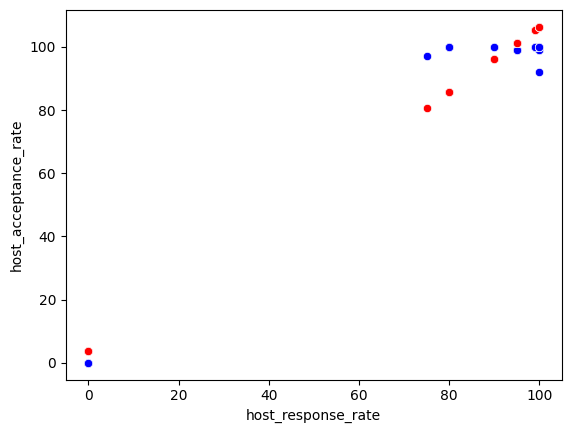

In [115]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [116]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.951897521440099

In [117]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.9756523568567336

In [118]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “host_acceptance_rate vs price”

In [119]:
data= hotel

In [120]:
data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)

<ipython-input-120-d16a30ad7a49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price= data.price.replace({'\$':''}, regex = True)
<ipython-input-120-d16a30ad7a49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.price= data.price.replace({'\,':''}, regex = True)
<ipython-input-120-d16a30ad7a49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [121]:
dep= data[['host_acceptance_rate']]
ind= data[['price']]

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

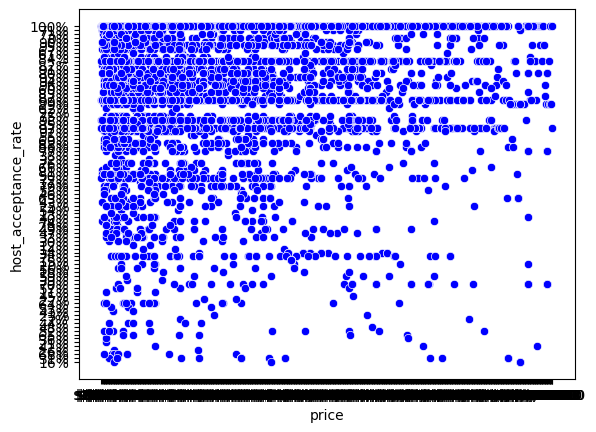

In [122]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [123]:
Vars_Indep= ind
Var_Dep= dep

In [124]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [125]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [126]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [127]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.00137987]]),
 'rank_': 1,
 'singular_': array([18888.09646464]),
 'intercept_': array([80.94552246])}

**Modelo matemático: y= 0.62852689x + 32.77244893**

---




In [128]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.009216635348141544

In [129]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[81.08074932],
       [81.12352517],
       [81.29048896],
       [81.07109026],
       [81.10972651],
       [94.74280249],
       [81.10972651],
       [81.10972651],
       [94.74280249],
       [94.74280249],
       [81.10972651],
       [94.74280249],
       [81.10972651],
       [81.10972651],
       [81.10972651],
       [81.08350906],
       [81.07109026],
       [81.28910909],
       [81.69202996],
       [81.42157622],
       [81.4105373 ],
       [81.48091046],
       [81.10972651],
       [81.10972651],
       [81.10972651],
       [81.12766477],
       [81.12766477],
       [81.08764865],
       [81.12766477],
       [81.08764865],
       [81.08764865],
       [81.07109026],
       [81.0697104 ],
       [81.12352517],
       [81.13732383],
       [81.09868758],
       [81.20493726],
       [81.23529432],
       [81.2766903 ],
       [81.10696678],
       [81.11524597],
       [81.10144731],
       [81.1387037 ],
       [81.04625268],
       [81.07247013],
       [82

In [130]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-130-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,price,Predicciones
711,100.0,98.0,81.080749
787,100.0,129.0,81.123525
938,92.0,250.0,81.290489
1704,100.0,91.0,81.071090
2229,100.0,119.0,81.109727
2230,100.0,9999.0,94.742802
2246,100.0,119.0,81.109727
2247,100.0,119.0,81.109727
2248,100.0,9999.0,94.742802
2252,100.0,9999.0,94.742802


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

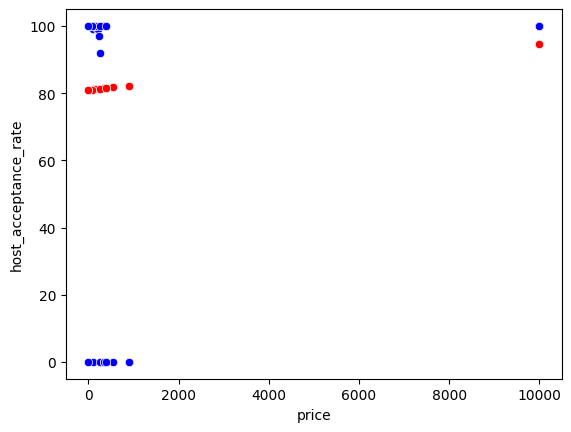

In [131]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [132]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.009216635348141544

In [133]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.09600330904787367

In [134]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “host_acceptance_rate vs number_of_reviews ”

In [135]:
data= hotel

In [136]:
dep= data[['host_acceptance_rate']]
ind= data[['number_of_reviews']]

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

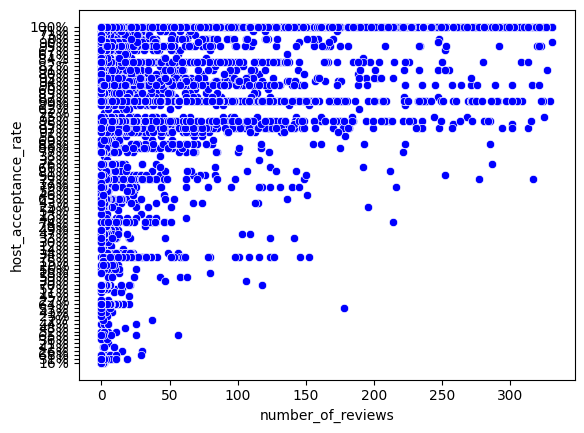

In [137]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [138]:
Vars_Indep= ind
Var_Dep= dep

In [139]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [140]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [141]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [142]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.17169808]]),
 'rank_': 1,
 'singular_': array([356.57354404]),
 'intercept_': array([76.68301983])}

**Modelo matemático: y= 0.15211964x + 84.17320674**

---




In [143]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05085706937026668

In [144]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[ 76.68301983],
       [121.8396158 ],
       [ 82.52075467],
       [ 79.77358533],
       [ 78.0566045 ],
       [ 77.19811408],
       [ 82.34905659],
       [ 80.28867958],
       [ 79.94528342],
       [ 81.14717   ],
       [ 80.63207575],
       [ 81.49056617],
       [ 79.43018917],
       [ 77.36981216],
       [ 79.94528342],
       [ 88.53018759],
       [ 86.12641442],
       [ 77.026416  ],
       [ 76.68301983],
       [ 76.85471791],
       [ 76.85471791],
       [ 76.68301983],
       [ 77.71320833],
       [ 77.19811408],
       [ 81.31886809],
       [ 77.36981216],
       [ 76.85471791],
       [ 77.36981216],
       [ 76.85471791],
       [ 88.18679143],
       [ 77.026416  ],
       [ 92.47924351],
       [ 93.6811301 ],
       [ 83.55094317],
       [ 80.46037767],
       [ 99.69056302],
       [ 78.0566045 ],
       [ 83.03584892],
       [ 78.40000067],
       [ 93.50943202],
       [ 76.68301983],
       [100.54905344],
       [ 79.086793  ],
       [ 92

In [145]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-145-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_acceptance_rate,number_of_reviews,Predicciones
711,100.0,0.0,76.683020
787,100.0,263.0,121.839616
938,92.0,34.0,82.520755
1704,100.0,18.0,79.773585
2229,100.0,8.0,78.056604
2230,100.0,3.0,77.198114
2246,100.0,33.0,82.349057
2247,100.0,21.0,80.288680
2248,100.0,19.0,79.945283
2252,100.0,26.0,81.147170


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

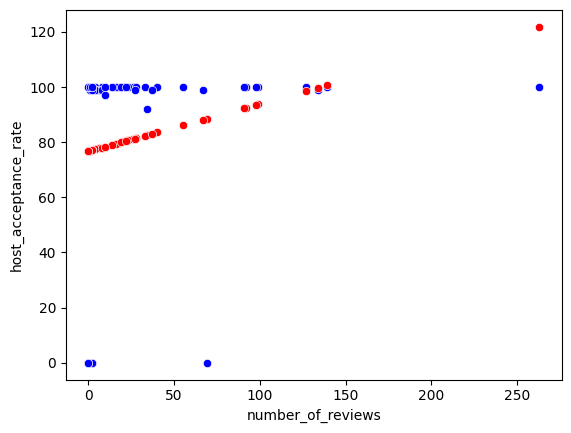

In [146]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [147]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.05085706937026668

In [148]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.22551512004800628

In [149]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “review_scores_location vs review_scores_cleanliness”

In [150]:
data= hotel

In [151]:
dep= data[['review_scores_location']]
ind= data[['review_scores_cleanliness']]

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

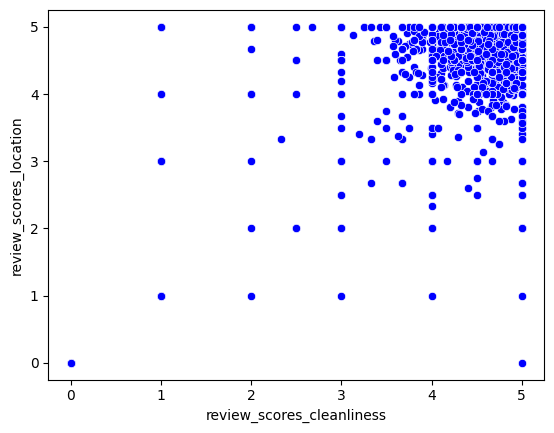

In [152]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [153]:
Vars_Indep= ind
Var_Dep= dep

In [154]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [155]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [156]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [157]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.869787]]),
 'rank_': 1,
 'singular_': array([9.23831518]),
 'intercept_': array([0.42412554])}

**Modelo matemático: y= 0.0.918502x + 0.38539555**

---




In [158]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.685443264649231

In [159]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[4.41644788],
       [4.39035427],
       [4.77306055],
       [4.36426066],
       [4.23379261],
       [4.48603084],
       [4.26858409],
       [4.11202243],
       [4.36426066],
       [4.30337557],
       [4.32077131],
       [4.27728196],
       [4.39035427],
       [4.77306055],
       [4.22509474],
       [4.30337557],
       [4.31207344],
       [4.33816705],
       [0.42412554],
       [4.77306055],
       [3.03348655],
       [0.42412554],
       [4.77306055],
       [4.48603084],
       [4.71217546],
       [4.5556138 ],
       [4.77306055],
       [4.77306055],
       [4.77306055],
       [4.69477972],
       [4.77306055],
       [4.40775001],
       [4.36426066],
       [4.71217546],
       [4.57300954],
       [4.36426066],
       [4.23379261],
       [4.34686492],
       [4.77306055],
       [4.40775001],
       [4.207699  ],
       [4.22509474],
       [3.96415864],
       [4.49472871],
       [4.40775001],
       [4.77306055],
       [4.77306055],
       [4.773

In [160]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-160-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,review_scores_location,review_scores_cleanliness,Predicciones
711,4.88,4.59,4.416448
787,4.84,4.56,4.390354
938,5.00,5.00,4.773061
1704,3.88,4.53,4.364261
2229,4.75,4.38,4.233793
2230,5.00,4.67,4.486031
2246,5.00,4.42,4.268584
2247,5.00,4.24,4.112022
2248,5.00,4.53,4.364261
2252,4.88,4.46,4.303376


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

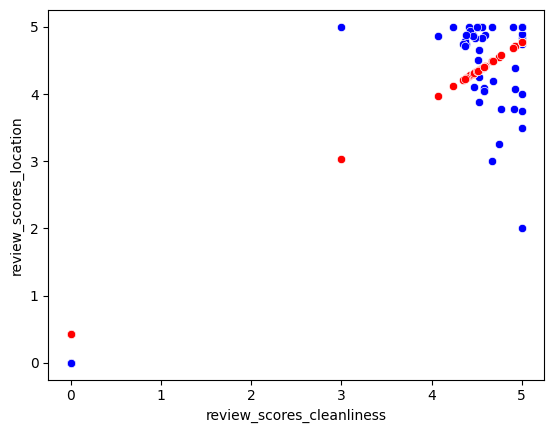

In [161]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [162]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.685443264649231

In [163]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.8279150105229588

In [164]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “availability_365 vs number_of_reviews”

In [165]:
data= hotel

In [166]:
dep= data[['availability_365']]
ind= data[['number_of_reviews']]

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

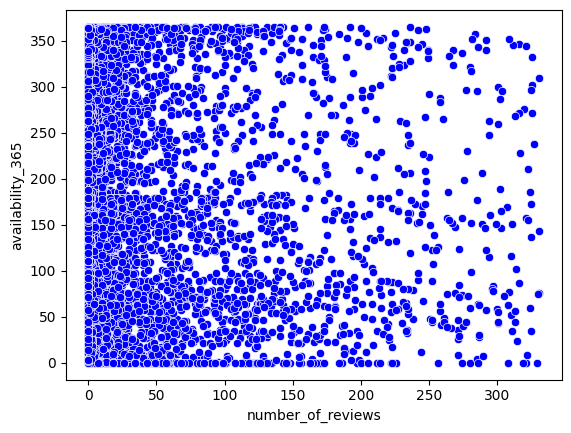

In [167]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [168]:
Vars_Indep= ind
Var_Dep= dep

In [169]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [170]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [171]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [172]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.05600524]]),
 'rank_': 1,
 'singular_': array([356.57354404]),
 'intercept_': array([175.62355457])}

**Modelo matemático: y= -0.25499994x + 246.03421549**

---




In [173]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0004138195366950592

In [174]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[175.62355457],
       [160.89417599],
       [173.71937635],
       [174.61546022],
       [175.17551264],
       [175.45553884],
       [173.77538159],
       [174.44744449],
       [174.55945498],
       [174.16741828],
       [174.33543401],
       [174.0554078 ],
       [174.7274707 ],
       [175.3995336 ],
       [174.55945498],
       [171.75919289],
       [172.54326627],
       [175.51154409],
       [175.62355457],
       [175.56754933],
       [175.56754933],
       [175.62355457],
       [175.28752312],
       [175.45553884],
       [174.11141304],
       [175.3995336 ],
       [175.56754933],
       [175.3995336 ],
       [175.56754933],
       [171.87120337],
       [175.51154409],
       [170.47107233],
       [170.07903564],
       [173.3833449 ],
       [174.39143925],
       [168.11885217],
       [175.17551264],
       [173.55136062],
       [175.06350215],
       [170.13504088],
       [175.62355457],
       [167.83882597],
       [174.83948118],
       [170

In [175]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-175-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,number_of_reviews,Predicciones
711,124,0.0,175.623555
787,157,263.0,160.894176
938,155,34.0,173.719376
1704,171,18.0,174.615460
2229,284,8.0,175.175513
2230,293,3.0,175.455539
2246,284,33.0,173.775382
2247,284,21.0,174.447444
2248,293,19.0,174.559455
2252,293,26.0,174.167418


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

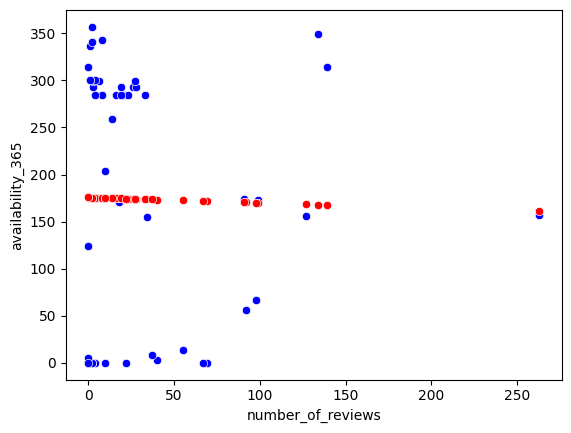

In [176]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [177]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.0004138195366950592

In [178]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.02034255482222081

In [179]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

## “reviews_per_month vs review_scores_communication”

In [180]:
data= hotel

In [181]:
dep= data[['reviews_per_month']]
ind= data[['review_scores_communication']]

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

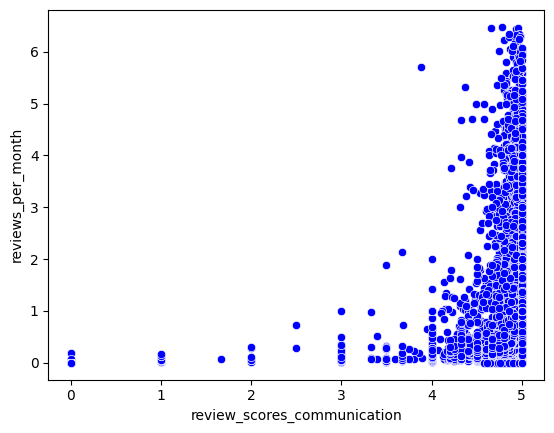

In [182]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [183]:
Vars_Indep= ind
Var_Dep= dep

In [184]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [185]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [186]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [187]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.18247894]]),
 'rank_': 1,
 'singular_': array([9.88430535]),
 'intercept_': array([-0.01935208])}

**Modelo matemático: y= 0.28910344x + 0.16789008**

---




In [188]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.06316410134109518

In [189]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=ind)
y_pred

array([[ 0.86019642],
       [ 0.84377331],
       [ 0.88756826],
       [ 0.81822626],
       [ 0.80180316],
       [ 0.89304263],
       [ 0.83282458],
       [ 0.82370063],
       [ 0.79632879],
       [ 0.87114515],
       [ 0.82187584],
       [ 0.794504  ],
       [ 0.85837163],
       [ 0.84742289],
       [ 0.81640147],
       [ 0.86749558],
       [ 0.829175  ],
       [ 0.89304263],
       [-0.01935208],
       [ 0.89304263],
       [ 0.52808474],
       [-0.01935208],
       [ 0.89304263],
       [ 0.77078174],
       [ 0.8455981 ],
       [ 0.84742289],
       [ 0.89304263],
       [ 0.89304263],
       [ 0.16312686],
       [ 0.83829895],
       [ 0.89304263],
       [ 0.84924768],
       [ 0.85289726],
       [ 0.84742289],
       [ 0.83464937],
       [ 0.85837163],
       [ 0.84742289],
       [ 0.85289726],
       [ 0.78355526],
       [ 0.84194852],
       [ 0.82552542],
       [ 0.81640147],
       [ 0.85472205],
       [ 0.84377331],
       [ 0.84742289],
       [ 0

In [190]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[dep.columns[0],ind.columns[0],'Predicciones']]


<ipython-input-190-7e4a6d6ecb3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,reviews_per_month,review_scores_communication,Predicciones
711,3.51,4.82,0.860196
787,2.78,4.73,0.843773
938,0.37,4.97,0.887568
1704,0.24,4.59,0.818226
2229,0.17,4.50,0.801803
2230,0.06,5.00,0.893043
2246,0.54,4.67,0.832825
2247,0.35,4.62,0.823701
2248,0.31,4.47,0.796329
2252,0.43,4.88,0.871145


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

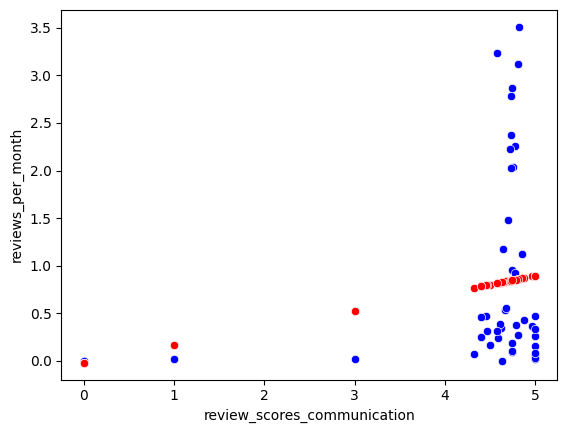

In [191]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x=ind.columns[0], y=dep.columns[0], color="blue", data=data)
sns.scatterplot(x=ind.columns[0], y='Predicciones', color="red", data=data)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [192]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter.append(coef_Deter)
coef_Deter

0.06316410134109518

In [193]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr.append(coef_Correl)
coef_Correl

0.25132469305879035

In [194]:
dependiente.append(dep.columns[0])
independiente.append(ind.columns[0])

# TABLA DE COEFICIENTES

In [195]:
coef= pd.DataFrame()

In [196]:
tipo=['Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Entire home/apt','Hotel room','Hotel Room','Hotel Room','Hotel room','Hotel Room','Hotel Room']

In [197]:
coef['Tipo Habitación'] = tipo
coef['dependiente'] = dependiente
coef['independiente'] = independiente
coef['Coef Determinación'] = deter
coef['Coef Correlación'] = corr

In [198]:
coef

,Tipo Habitación,dependiente,independiente,Coef Determinación,Coef Correlación
0,Entire home/apt,host_acceptance_rate,host_response_rate,0.394167,0.627827
1,Entire home/apt,host_acceptance_rate,price,0.001412,0.037574
2,Entire home/apt,host_acceptance_rate,number_of_reviews,0.024557,0.156706
3,Entire home/apt,review_scores_location,review_scores_cleanliness,0.960796,0.980202
4,Entire home/apt,availability_365,number_of_reviews,0.010570,0.102809
5,Entire home/apt,reviews_per_month,review_scores_communication,0.123237,0.351052
6,Hotel room,host_acceptance_rate,host_response_rate,0.951898,0.975652
7,Hotel Room,host_acceptance_rate,price,0.009217,0.096003
8,Hotel Room,host_acceptance_rate,number_of_reviews,0.050857,0.225515
9,Hotel room,review_scores_location,review_scores_cleanliness,0.685443,0.827915
